# Particle in a box

Let's apply the whole thing to the problem of a particle in a box. This means, we look at a quantum mechanical object in a potential well. 

In [3]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

The problem is sketched below.

![Particle in a Box](particle_in_box.png)

We need to define this rectangular box with zero potential energy inside the box and finite potential energy outside. Since the quantum mechanical object is a wave, we expect that only certain standing waves of particular wavelength can exist inside the box. These waves are connected to certain probability densities of finding the particle at certain positions and specific energy values. These are the energy levels, which are often characteristic of the quantum realm.

## Definition of the problem

Before we start, we need to define some quantities:

* we will study a box of d=1 nm in width in a domain of L=5 nm
* we will use N=1001 points for our $x_{i}$
* our potential energy shall have a barrier height of 1 eV 
* the potential energy inside the box will be zero

In [56]:
# define some useful constants
hbar=1.678e-35 #joule seconds
m_e=9.10938356e-31 # kg
V_0=1.602e-19 # J
N=1001

d=1e-9 # m
L= 10e-9 #m

x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

### Potential energy

We first define the diagonal potential energy matrix.

In [85]:
U_vec = np.zeros(N)
U_vec[np.abs(x)>d/2]=V_0

# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

### Kinetic energy

Next are the derivatives of the kinetic energy matrix.

In [80]:
# T is the finite difference2 representation of the second derivative in the kinetic energy
T = -hbar**2*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2/2/m_e

An finally the total Hamilton operator matrix.

In [81]:
# Sum of kinetic and potential energy
H = T + U

### Solution 

The last step is to solve the system of coupled equations usering the `eigsh` method of the `scipy`
module. We can already anticipate that we get multiple solution, e.g. multiple wavelength that fit inside the box. So there must be a certain number of eigenvalues. The method `eigsh` allows to specify the number of eigenvalues and eigenfunctions $n$ we would like to calculate. 

In [86]:
# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=20
vals, vecs = eigsh(H, k=n,which='SM')

### Plotting

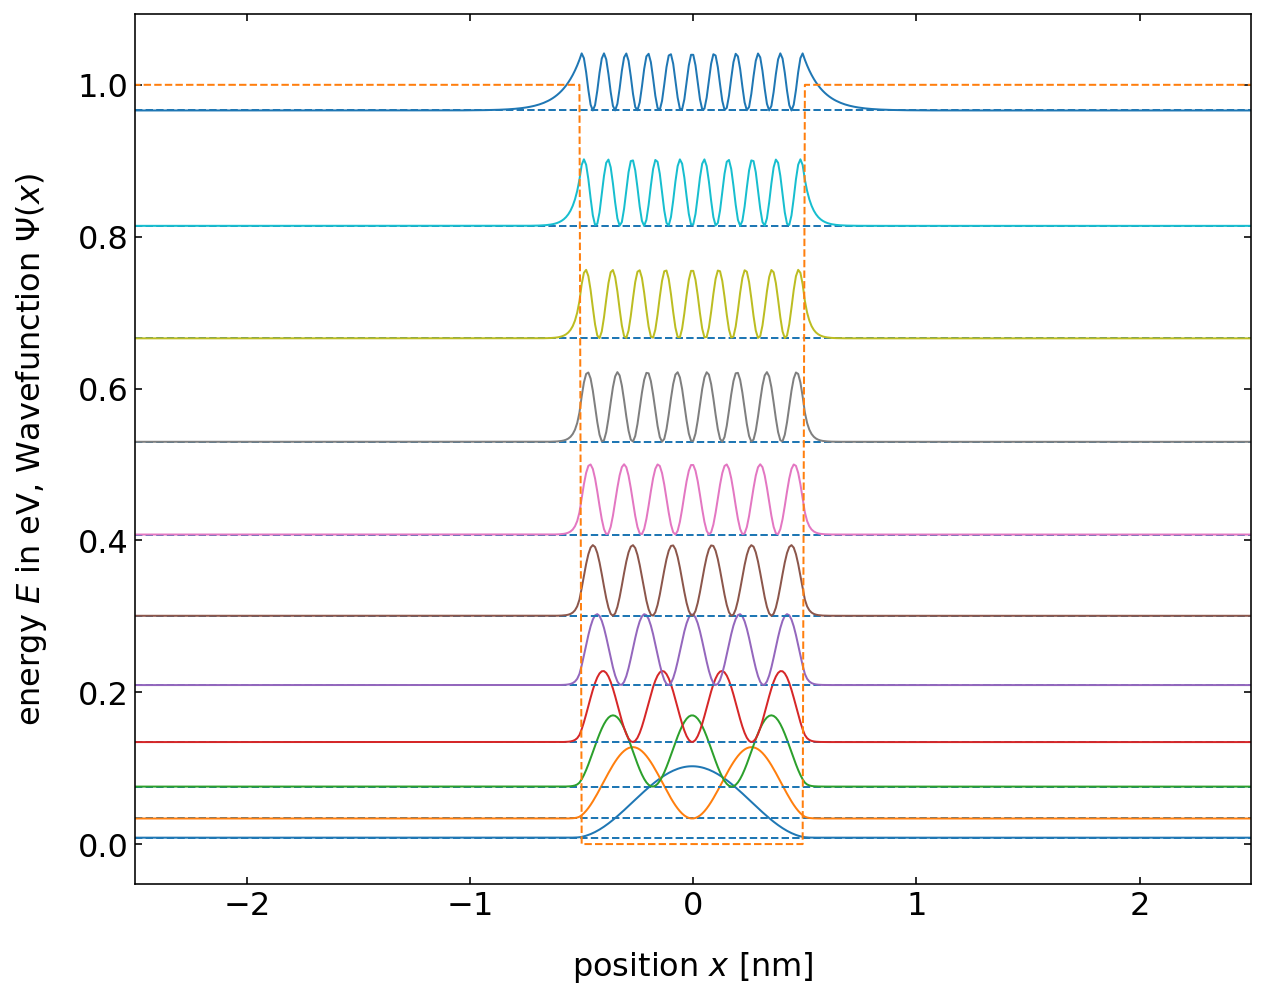

In [83]:
# define some scaling to make a nice plot
scale=1e9 # position scale
escale=6.242e18 # energy scale in eV
psiscale=5 # wavefunction scale 

plt.figure(figsize=(10,8))

for k in range(11):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.axhline(y=vals[k]*escale,ls='--')
    plt.plot(x*scale, psiscale*np.abs(vec)**2+vals[k]*escale)

 
plt.xlabel(r"position $x$ [nm]")
plt.ylabel(r"energy $E$ in eV, Wavefunction $\Psi(x)$")
plt.xlim([-L/4*scale,L/4*scale])
plt.show()

The diagram shows the corresponding energy states (the eigenvalues of the solution) and the value $|\Psi|^2$, which gives the probability to find the particle inside the box. The latter shows, that in contrast to what we expect from classical theory, where we would expect the particle to be with equal probability found at all positions inside the box, we get in quantum mechanics only certain positions at which we would find the particle. Also, the higher the energy state, the more equally is the particle distributed over the box. For a finite box depth, however, we get only a finite number of energy states in which the particle is bound.
A second interesting observation here is that the particle has a finite probability to enter the potential barrier. Especially for the higher energy states, the wavefunction decays exponentially into the barrier. This is similar to the evanescent wave we studied during the last lecture. 

### Energies of bound states

In the case of the particle in a box only certain energies are allowed. The energies which correspond to these distributions are increasing nonlinearly with its index. Below we plot the energy as a function of the index of the energy value. This index is called *quantum number* as we can enumerate the solutions in quantum mechanics. The graph shows that the energy of the bound states increases with the square of the quantum number, i.e. $E_{n}\propto n^2$.


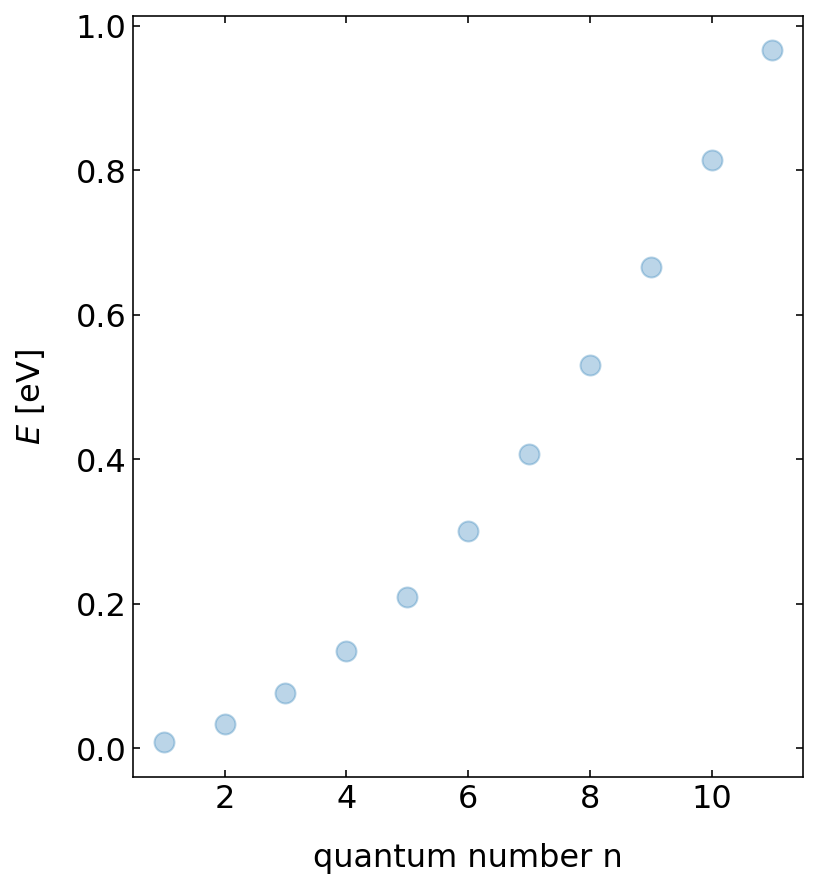

In [84]:
fig = plt.figure(figsize=(6,7))
plt.xlabel('quantum number n')
plt.ylabel(r"$E$ [eV]")
plt.plot(np.array(range(len(vals[:11])))+1,vals[:11]*escale,'o',alpha=0.3)

## Where to go from here?

You may try at this point to create two closely spaced potential wells, e.g. two of 1 nm width with a distance of 0.1 nm or with a distance of 2 nm. You should see that for large distances of the wells the energy values in the individual wells are the same, while for the smaller distance they split up into two due to the interaction.

![Double Well](double_well.png)